**Goal** : Predict a student chances of admission for a particular university.

### Dataset Description

**Data Source** :  https://www.kaggle.com/mohansacharya/graduate-admissions

> The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 
> 1. GRE Scores ( out of 340 ) 
> 2. TOEFL Scores ( out of 120 )
> 3. University Rating ( out of 5 ) 
> 4. Statement of Purpose Strength ( out of 5 ) 
> 5. Letter of Recommendation Strength ( out of 5 ) 
> 6. Undergraduate GPA ( out of 10 ) 
> 7. Research Experience ( either 0 or 1 ) 
> 8. Chance of Admit ( ranging from 0 to 1 )

#### Loading required libraries

In [1]:
# data manipulation and computation
import pandas as pd  
import numpy as np
# visualization
import matplotlib.pyplot as plt 
import seaborn as sns
# model implementation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# model visualization
from sklearn.tree import export_graphviz
import pydot

In [2]:
# managing warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Reading and Inspecting Data

In [197]:
adm = pd.read_csv("Admission_Predict.csv")

In [4]:
adm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
adm.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Extracting features and label and split data into Train and Test set

In [198]:
y = adm['Chance of Admit ']
X = adm.iloc[:,1:8]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [9]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (320, 7)
y_train:  (320,)
X_test:  (80, 7)
y_test:  (80,)


### Training the model and making predictions

In [181]:
# Instantiate an object of the class RandomForestRegressor
randomForest = RandomForestRegressor(random_state=123)

In [182]:
randomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [183]:
# Making Prediction
y_pred = randomForest.predict(X_test)

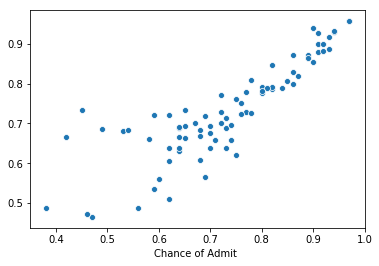

In [513]:
# Plot actual vs predicted
sns.scatterplot(y_test, y_pred);

In [435]:
# Display and Visualize Feature Importance
featuresImportance = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': randomForest.feature_importances_}).\
                    sort_values('importance', ascending = False)
featuresImportance

,feature,importance
5,CGPA,0.470627
0,GRE Score,0.311116
1,TOEFL Score,0.128691
2,University Rating,0.035536
3,SOP,0.033776
4,LOR,0.012759
6,Research,0.007496


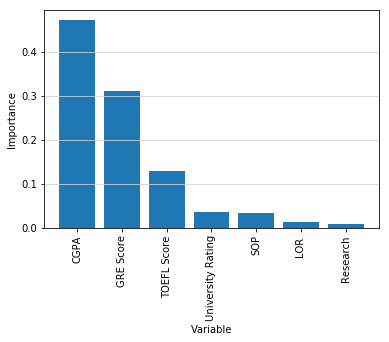

In [436]:
plt.bar(featuresImportance['feature'], height =featuresImportance['importance'])
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.grid(axis = 'y', color = '#D3D3D3', linestyle = 'solid')
plt.xticks(rotation = 90);

### Evaluate the model

In [187]:
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared scores
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared scores
adj_r2 = 1 - (1 - r2)*(X_train.shape[0] - 1)/(X_train.shape[0] - X_train.shape[1] - 1)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 3))
print('Adj.R-squared scores:', round(adj_r2, 3))

Mean Absolute Error: 0.05
Mean Squared Error: 0.01
R-squared scores: 0.668
Adj.R-squared scores: 0.661


In [294]:
# Pick up one tree from the forest
tree = randomForest.estimators_[3]

In [295]:
# Export the image to a dot file
export_graphviz(tree, out_file='tree.dot', 
                feature_names = X.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [296]:
# Export the image as a png file
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png');

### Exploring model hyperparameters

#### 1. Model's Depth

max_depth:  1.0         adj.R2_test:  -0.032
max_depth:  2.0         adj.R2_test:  0.486
max_depth:  3.0         adj.R2_test:  0.561
max_depth:  4.0         adj.R2_test:  0.609
max_depth:  5.0         adj.R2_test:  0.656
max_depth:  6.0         adj.R2_test:  0.694
max_depth:  7.0         adj.R2_test:  0.681
max_depth:  8.0         adj.R2_test:  0.679
max_depth:  9.0         adj.R2_test:  0.673
max_depth:  10.0         adj.R2_test:  0.695
max_depth:  11.0         adj.R2_test:  0.688
max_depth:  12.0         adj.R2_test:  0.68
max_depth:  13.0         adj.R2_test:  0.687
max_depth:  14.0         adj.R2_test:  0.68
max_depth:  15.0         adj.R2_test:  0.692
max_depth:  16.0         adj.R2_test:  0.691
max_depth:  17.0         adj.R2_test:  0.686
max_depth:  18.0         adj.R2_test:  0.686
max_depth:  19.0         adj.R2_test:  0.686
max_depth:  20.0         adj.R2_test:  0.686
max_depth:  21.0         adj.R2_test:  0.686
max_depth:  22.0         adj.R2_test:  0.686
max_depth:  23.0    

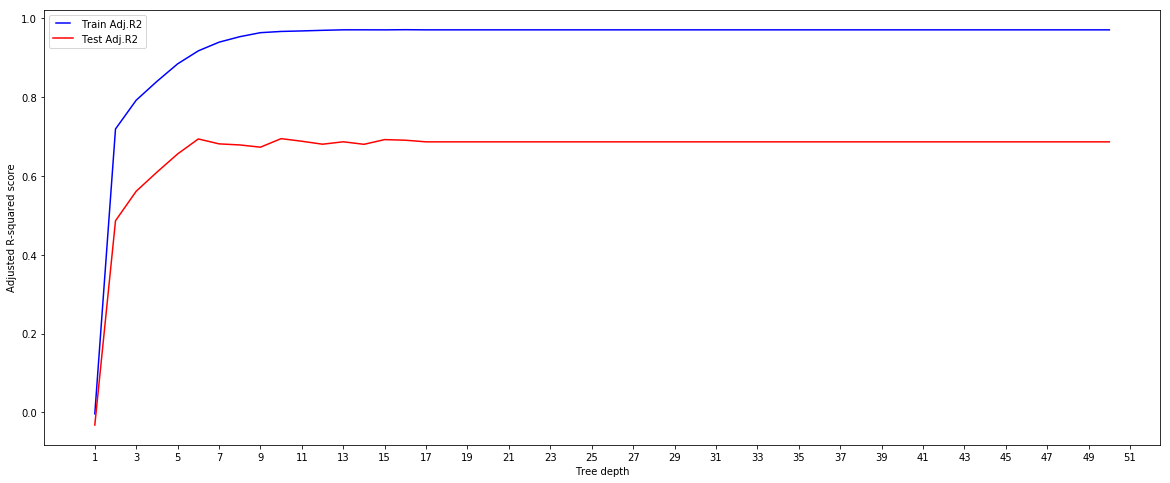

In [199]:
max_depths = np.linspace(1,50,50, endpoint=True)
train_results = []
test_results = []
for i, max_depth in enumerate(max_depths):
    rf = RandomForestRegressor(max_depth=max_depth, random_state=101)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    r2_train = r2_score(train_pred, y_train)
    adjst_R2_train = 1 - (1 - r2_train*(X_train.shape[0] - 1)/(X_train.shape[0] - X_train.shape[1] - 1))
    train_results.append(adjst_R2_train)
    
    y_pred = rf.predict(X_test)
    r2_test = r2_score(y_pred, y_test)
    adjst_R2_test = 1 - (1 - r2_test*(X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1))
    test_results.append(adjst_R2_test)
    print("max_depth: ", max_depth, " ", " "," ", "  adj.R2_test: ", round(test_results[i],3))

from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize = (20,8))
line1, = plt.plot(max_depths, train_results, 'b', label="Train Adj.R2")
line2, = plt.plot(max_depths, test_results, 'r', label="Test Adj.R2")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Adjusted R-squared score")
plt.xlabel("Tree depth")
plt.xticks(range(1,52,2))
plt.show()

#### 2. Number of Trees in the forest

nb_estimator:  1     adj.R2:  0.44
nb_estimator:  2     adj.R2:  0.601
nb_estimator:  3     adj.R2:  0.644
nb_estimator:  4     adj.R2:  0.675
nb_estimator:  5     adj.R2:  0.672
nb_estimator:  6     adj.R2:  0.67
nb_estimator:  7     adj.R2:  0.685
nb_estimator:  8     adj.R2:  0.677
nb_estimator:  9     adj.R2:  0.678
nb_estimator:  10     adj.R2:  0.686
nb_estimator:  11     adj.R2:  0.678
nb_estimator:  12     adj.R2:  0.692
nb_estimator:  13     adj.R2:  0.679
nb_estimator:  14     adj.R2:  0.677
nb_estimator:  15     adj.R2:  0.676
nb_estimator:  16     adj.R2:  0.675
nb_estimator:  17     adj.R2:  0.666
nb_estimator:  18     adj.R2:  0.661
nb_estimator:  19     adj.R2:  0.658
nb_estimator:  20     adj.R2:  0.653
nb_estimator:  21     adj.R2:  0.653
nb_estimator:  22     adj.R2:  0.641
nb_estimator:  23     adj.R2:  0.64
nb_estimator:  24     adj.R2:  0.643
nb_estimator:  25     adj.R2:  0.639
nb_estimator:  26     adj.R2:  0.645
nb_estimator:  27     adj.R2:  0.646
nb_estimator:

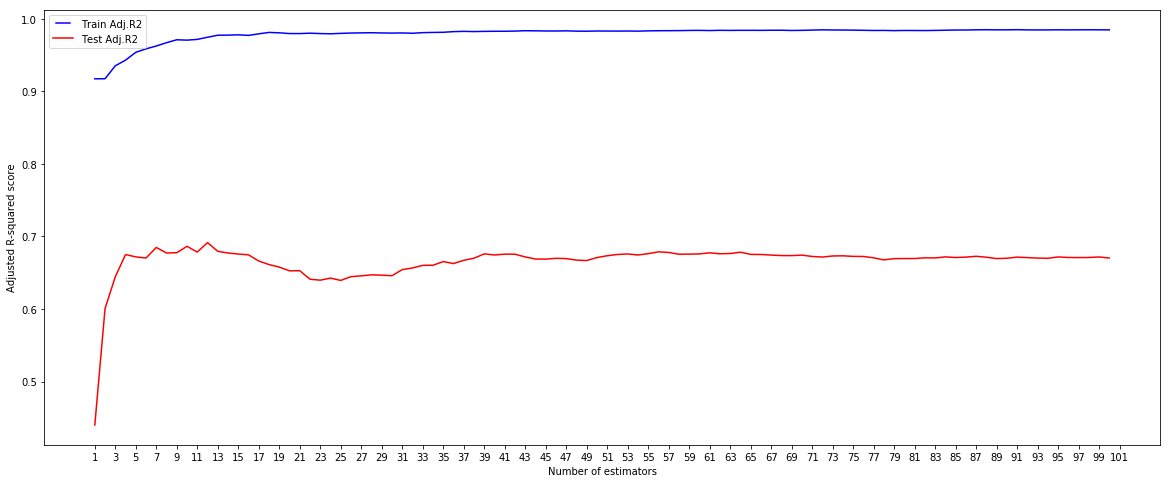

In [454]:
nb_trees = np.linspace(1,100,100, dtype = int, endpoint=True)
train_results = []
test_results = []
for i, n in enumerate(nb_trees):
    rf = RandomForestRegressor(n_estimators=n, random_state= 101)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    r2_train = r2_score(train_pred, y_train)
    adjst_R2_train = 1 - (1 - r2_train*(X_train.shape[0] - 1)/(X_train.shape[0] - X_train.shape[1] - 1))
    train_results.append(adjst_R2_train)
    
    y_pred = rf.predict(X_test)
    r2_test = r2_score(y_pred, y_test)
    adjst_R2_test = 1 - (1 - r2_test*(X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1))
    test_results.append(adjst_R2_test)
    print("nb_estimator: ", n, " ", " ", "adj.R2: ", round(test_results[i],3))

from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize = (20,8))
line1, = plt.plot(nb_trees, train_results, 'b', label="Train Adj.R2")
line2, = plt.plot(nb_trees, test_results, 'r', label="Test Adj.R2")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Adjusted R-squared score")
plt.xlabel("Number of estimators")
plt.xticks(range(1,103,2))
plt.show()


#### 3. Number of Features

In [102]:
options = [None, 0.5, 3,"sqrt", "log2"]

In [122]:
def adj_R2_max_features ():
    adjst_R2 = []
    for option in options:
        rf = RandomForestRegressor(random_state= 101, max_features=option)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        r2_test = r2_score(y_pred, y_test)
        adjst_R2_test = 1 - (1 - r2_test*(X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1))
        adjst_R2.append(adjst_R2_test)
    
    x_labels = ["None", "0.5 ", "3   ","sqrt", "log2"]
    for i in range(len(adjst_R2)):
        print("Max_features option: ",x_labels[i], " ", " ", "Adjusted R2 score: ", round(adjst_R2[i],5))

In [123]:
adj_R2_max_features()

Max_features option:  None     Adjusted R2 score:  0.68641
Max_features option:  0.5      Adjusted R2 score:  0.71939
Max_features option:  3        Adjusted R2 score:  0.71939
Max_features option:  sqrt     Adjusted R2 score:  0.71587
Max_features option:  log2     Adjusted R2 score:  0.71587


#### 4. Minimum number of samples in each leaf node

min_samples_leafs:  0.02     adj.R2:  0.6803748718378093
min_samples_leafs:  0.03     adj.R2:  0.6518921331357306
min_samples_leafs:  0.04     adj.R2:  0.6244504528200922
min_samples_leafs:  0.05     adj.R2:  0.5933338068868511
min_samples_leafs:  0.06     adj.R2:  0.5698248834143512
min_samples_leafs:  0.07     adj.R2:  0.5735440427323356
min_samples_leafs:  0.08     adj.R2:  0.570211596301279
min_samples_leafs:  0.09     adj.R2:  0.558265508062949
min_samples_leafs:  0.1     adj.R2:  0.550210897931811
min_samples_leafs:  0.11     adj.R2:  0.5443656367899997
min_samples_leafs:  0.12     adj.R2:  0.5349297933214543
min_samples_leafs:  0.13     adj.R2:  0.5318130340390835
min_samples_leafs:  0.14     adj.R2:  0.48798348510917156
min_samples_leafs:  0.15     adj.R2:  0.4769311578150913
min_samples_leafs:  0.16     adj.R2:  0.4011443464916953
min_samples_leafs:  0.17     adj.R2:  0.4379309703226706
min_samples_leafs:  0.18     adj.R2:  0.39808315797606153
min_samples_leafs:  0.19     adj.

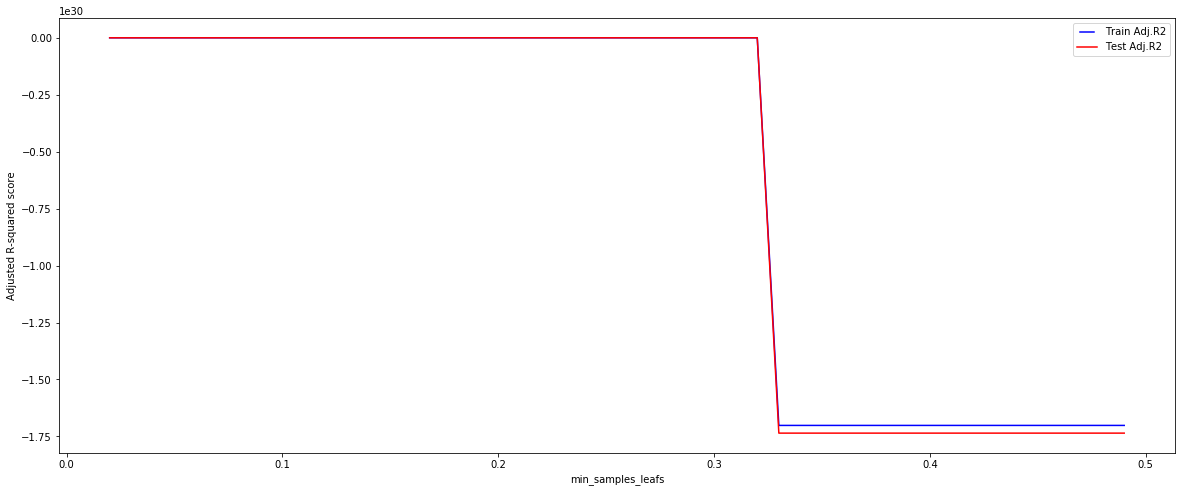

In [155]:
min_samples_leafs = np.arange(0.02,0.5, 0.01)

train_results = []
test_results = []
for i, min_samples_leaf in enumerate(min_samples_leafs):
    rf = RandomForestRegressor(min_samples_leaf=min_samples_leaf, random_state=101)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    r2_train = r2_score(train_pred, y_train)
    adjst_R2_train = 1 - (1 - r2_train*(X_train.shape[0] - 1)/(X_train.shape[0] - X_train.shape[1] - 1))
    train_results.append(adjst_R2_train)
    
    y_pred = rf.predict(X_test)
    r2_test = r2_score(y_pred, y_test)
    adjst_R2_test = 1 - (1 - r2_test*(X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1))
    test_results.append(adjst_R2_test)
    print("min_samples_leafs: ", round(min_samples_leaf,3), " ", " ", "adj.R2: ", test_results[i])

from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize = (20,8))
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train Adj.R2")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test Adj.R2")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Adjusted R-squared score")
plt.xlabel("min_samples_leafs")
plt.show()


### Training a new model setting hyperparameters according to findings in the previous section

In [188]:
randomForestTuned = RandomForestRegressor(max_depth = 10, max_features=0.5, n_estimators=12,\
              min_samples_leaf=0.02, random_state=123)

In [189]:
randomForestTuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=0.02, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [190]:
y_predTuned = randomForestTuned.predict(X_test)

#### Evaluating the new model

In [196]:
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_predTuned)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_predTuned)

# R-squared scores
r2 = r2_score(y_test, y_predTuned)

# Adjusted R-squared scores
adj_r2 = 1 - (1 - r2)*(X_train.shape[0] - 1)/(X_train.shape[0] - X_train.shape[1] - 1)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 3))
print('Adj.R-squared scores:', round(adj_r2, 3))

Mean Absolute Error: 0.05
Mean Squared Error: 0.01
R-squared scores: 0.727
Adj.R-squared scores: 0.721
